In [20]:
import datajoint as dj

In [21]:
schema = dj.Schema('app')

In [22]:
@schema
class Account(dj.Manual):
    definition = """ 
    phone      : bigint unsigned
    ---
    first_name : varchar(30)
    last_name  : varchar(30)
    dob        : date
"""


In [23]:
@schema
class CreditCard(dj.Manual):
    definition = """ 
    card_number :  bigint unsigned
    ---
    exp_date    : date
    cvc         : smallint unsigned
    zipcode     : int unsigned
    -> Account
    """

In [24]:
@schema
class AddOn(dj.Lookup):
    definition = """ 
    addon_id : bigint unsigned
    ---
    addon_name : varchar(30)
    price : decimal(5, 2) unsigned
    """

    contents = (1, "Track & Field", 13.99), (2, "Marathon", 26.2), (3, "Sprint", 100.00) 

In [25]:
AddOn()

addon_id,addon_name,price
1,Track & Field,13.99
2,Marathon,26.20
3,Sprint,100.00


In [26]:
@schema
class Purchase(dj.Manual):
    definition = """ 
    -> Account
    -> AddOn
    ---
    -> CreditCard 
    """

In [27]:
Purchase()

phone,addon_id,card_number


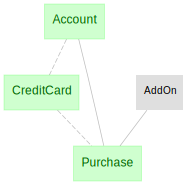

In [28]:
dj.Diagram(schema)

Populate database using fake data

In [31]:
import random
from tqdm import tqdm
from faker import Faker 
fake = Faker()

In [32]:
Account.insert1(dict(
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    dob=fake.date_of_birth()))

In [34]:
Account.insert(dict(
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    dob=fake.date_of_birth()) for _ in range(10000))

In [35]:
Account()

phone,first_name,last_name,dob
10007189411,Julia,Medina,1990-10-25
10019036667,Joseph,Mosley,1938-11-15
10022084083,Joseph,Oneal,1941-07-27
10029750284,Tonya,Mills,1915-06-19
10042163305,Danielle,Oneal,1995-11-06
10046907814,Howard,Jones,1937-10-06
10050855637,Steven,Yang,1947-12-03
10055394935,Christopher,Wagner,1924-09-12
10075751151,Austin,Oliver,1951-03-20
10076202140,David,Smith,1954-02-05


In [36]:
keys = Account.fetch("KEY")

In [37]:
CreditCard.insert(
    dict(random.choice(keys), 
         zipcode=random.randint(10000,99999), 
         card_number=int(fake.credit_card_number()),
         cvc=random.randint(1, 999), 
         exp_date=fake.future_date()) for _ in range(15000))

In [38]:
### insert random subsamples. Run several times to populate more
purchases = (Account * CreditCard * AddOn - Purchase).fetch("KEY")
for _ in tqdm(range(100)):
    try:
        Purchase.insert(random.sample(purchases, 30))
    except dj.errors.DuplicateError:
        continue

100%|██████████| 100/100 [00:03<00:00, 31.69it/s]


## Queries

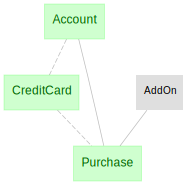

In [39]:
schema.spawn_missing_classes()
dj.Diagram(schema)

In [40]:
Purchase()

phone,addon_id,card_number
67326216872,1,60432984049
14463053884,3,60440325987
69822997386,2,60442906750
25958428082,1,60446718607
46589639369,1,60465241515
85355330846,2,60466623331
90879511364,3,60497623466
78277538731,2,501814162878
58215791485,1,501817245068
82378824485,3,501832701921


In [41]:
Account()

phone,first_name,last_name,dob
10007189411,Julia,Medina,1990-10-25
10019036667,Joseph,Mosley,1938-11-15
10022084083,Joseph,Oneal,1941-07-27
10029750284,Tonya,Mills,1915-06-19
10042163305,Danielle,Oneal,1995-11-06
10046907814,Howard,Jones,1937-10-06
10050855637,Steven,Yang,1947-12-03
10055394935,Christopher,Wagner,1924-09-12
10075751151,Austin,Oliver,1951-03-20
10076202140,David,Smith,1954-02-05


In [43]:
Account.fetch(as_dict=True, order_by=('last_name DESC', 'first_name DESC'), limit=10)

[{'phone': 17665106031,
  'first_name': 'Sean',
  'last_name': 'Zuniga',
  'dob': datetime.date(1998, 1, 13)},
 {'phone': 48985875431,
  'first_name': 'Nathaniel',
  'last_name': 'Zimmerman',
  'dob': datetime.date(1986, 8, 1)},
 {'phone': 92608516078,
  'first_name': 'Michael',
  'last_name': 'Zimmerman',
  'dob': datetime.date(1944, 11, 7)},
 {'phone': 12281911253,
  'first_name': 'Melissa',
  'last_name': 'Zimmerman',
  'dob': datetime.date(1917, 1, 19)},
 {'phone': 49095451501,
  'first_name': 'Mark',
  'last_name': 'Zimmerman',
  'dob': datetime.date(1914, 2, 11)},
 {'phone': 19105564069,
  'first_name': 'Lisa',
  'last_name': 'Zimmerman',
  'dob': datetime.date(2021, 2, 4)},
 {'phone': 32637920711,
  'first_name': 'Joseph',
  'last_name': 'Zimmerman',
  'dob': datetime.date(2016, 12, 2)},
 {'phone': 57399656792,
  'first_name': 'Joseph',
  'last_name': 'Zimmerman',
  'dob': datetime.date(1908, 11, 23)},
 {'phone': 78040193655,
  'first_name': 'Cynthia',
  'last_name': 'Zimmerman'

In [44]:
Account.fetch(as_dict=True, order_by=('dob DESC'), limit=10, offset=100)

[{'phone': 87642812412,
  'first_name': 'Robert',
  'last_name': 'Elliott',
  'dob': datetime.date(2022, 8, 5)},
 {'phone': 73164953239,
  'first_name': 'Tasha',
  'last_name': 'Carter',
  'dob': datetime.date(2022, 8, 3)},
 {'phone': 37027176083,
  'first_name': 'Mike',
  'last_name': 'Clark',
  'dob': datetime.date(2022, 8, 2)},
 {'phone': 70298185167,
  'first_name': 'Christina',
  'last_name': 'Brewer',
  'dob': datetime.date(2022, 8, 1)},
 {'phone': 66044931258,
  'first_name': 'Melvin',
  'last_name': 'Rodriguez',
  'dob': datetime.date(2022, 7, 31)},
 {'phone': 46128462010,
  'first_name': 'Kyle',
  'last_name': 'Stafford',
  'dob': datetime.date(2022, 7, 26)},
 {'phone': 41032434246,
  'first_name': 'Nicole',
  'last_name': 'George',
  'dob': datetime.date(2022, 7, 24)},
 {'phone': 99544786963,
  'first_name': 'Sarah',
  'last_name': 'Payne',
  'dob': datetime.date(2022, 7, 17)},
 {'phone': 38374915348,
  'first_name': 'Amber',
  'last_name': 'Sawyer',
  'dob': datetime.date(20

## Simple Queries

In [45]:
#1 : All accounts last_names fro persons names "Paul" or "Paula" born in the 1990s
Account & 'first_name in ("Paul", "Paula")' & 'year(dob) between 1990 and 1999'

phone,first_name,last_name,dob
10691751311,Paula,Carey,1994-06-18
20891313915,Paul,Phillips,1998-06-16
66711962672,Paula,Reynolds,1993-02-20
75255732152,Paul,Sanchez,1995-01-22
98122881201,Paula,Bailey,1999-06-26


In [46]:
Account & 'last_name="Michael"'


phone,first_name,last_name,dob
45196246133,Daniel,Michael,1934-07-28
52685206229,Patrick,Michael,1939-12-15
76671399238,Angela,Michael,2004-05-20
93782087765,Christina,Michael,1940-11-04


In [47]:
Account & 'first_name="Anne"' & 'dob > "2001-01-01"'

phone,first_name,last_name,dob


In [48]:
Account & 'DATEDIFF(now(), dob) < 300'

phone,first_name,last_name,dob
10624788890,Christopher,Reeves,2023-03-01
12157270377,James,Meyer,2023-01-11
15195525065,Travis,Webster,2023-05-09
16082576864,Maria,Gonzalez,2023-09-24
17135719958,Cheryl,Gross,2023-06-15
17312010740,James,Parker,2023-10-03
17425480791,Miguel,Jones,2023-05-26
18065726753,Linda,Sims,2023-09-30
23156219679,Elizabeth,Gaines,2023-07-07
24512750711,Carl,Moore,2023-03-17


In [49]:
millennials = Account & 'dob > "1978-01-01"' & 'dob < "1997-01-01"'

In [50]:
millennials & 'first_name="Michael"'

phone,first_name,last_name,dob
15000185343,Michael,Long,1982-10-22
17013923839,Michael,Russell,1991-12-22
27656240383,Michael,Long,1979-09-16
31933870220,Michael,Cooper,1979-09-05
35761639823,Michael,Hernandez,1990-12-16
40607418326,Michael,Freeman,1990-04-14
42818290896,Michael,Mccoy,1984-09-08
43328168563,Michael,Hodge,1996-01-18
45950519708,Michael,Rosales,1978-07-13
49545721638,Michael,Williams,1984-05-14


In [51]:
millennials & 'dob BETWEEN "1978-01-01" AND "1997-01-01"'

phone,first_name,last_name,dob
10007189411,Julia,Medina,1990-10-25
10042163305,Danielle,Oneal,1995-11-06
10084670137,Ethan,Williams,1981-12-24
10189331983,Logan,Dawson,1981-06-08
10252353615,Larry,Price,1996-10-29
10267271291,Devon,Miller,1995-02-28
10281636918,Edward,Friedman,1987-12-14
10349932095,Alyssa,Nguyen,1985-09-13
10369189748,David,Bishop,1996-07-18
10441506417,Cynthia,Rodriguez,1994-06-12


In [52]:
## Restriction is selecting the rows
## Projection is selecting, calculating, and renaming the columns.

Account.proj()

phone
10007189411
10019036667
10022084083
10029750284
10042163305
10046907814
10050855637
10055394935
10075751151
10076202140


In [53]:
Account.proj('last_name')

phone,last_name
10007189411,Medina
10019036667,Mosley
10022084083,Oneal
10029750284,Mills
10042163305,Oneal
10046907814,Jones
10050855637,Yang
10055394935,Wagner
10075751151,Oliver
10076202140,Smith


In [54]:
Account.proj(..., '-dob') ## everything minus the dob

phone,first_name,last_name
10007189411,Julia,Medina
10019036667,Joseph,Mosley
10022084083,Joseph,Oneal
10029750284,Tonya,Mills
10042163305,Danielle,Oneal
10046907814,Howard,Jones
10050855637,Steven,Yang
10055394935,Christopher,Wagner
10075751151,Austin,Oliver
10076202140,David,Smith


In [55]:
full_name = Account.proj(full_name='concat(last_name, ", ", first_name)')

In [56]:
full_name.fetch(order_by="full_name", format="frame")

,full_name
phone,
96693863530,"Abbott, Anthony"
94265959146,"Abbott, Audrey"
55276972441,"Abbott, Deborah"
84002298166,"Abbott, Jeffrey"
82106806553,"Abbott, Laura"
...,...
49095451501,"Zimmerman, Mark"
12281911253,"Zimmerman, Melissa"
92608516078,"Zimmerman, Michael"


In [57]:
Account.proj(age="datediff(now(), dob)") ## age in days

phone,age calculated attribute
10007189411,12037
10019036667,31009
10022084083,30024
10029750284,39559
10042163305,10199
10046907814,31414
10050855637,27704
10055394935,36186
10075751151,26501
10076202140,25448


In [63]:
##age in years
accounts = Account.proj(age="floor(datediff(now(), dob)/365.25)")

In [64]:
accounts & 'age > 35'

phone,age calculated attribute
10019036667,84
10022084083,82
10029750284,108
10046907814,86
10050855637,75
10055394935,99
10075751151,72
10076202140,69
10084670137,41
10095851119,78


In [65]:
(accounts & 'age > 35').make_sql()

'SELECT `phone`,`age` FROM (SELECT `phone`,floor(datediff(now(), dob)/365.25) as `age` FROM `app`.`account`) as `$4` WHERE ( (age > 35))'

In [66]:
accounts & 'age between 35 and 45'

phone,age calculated attribute
10084670137,41
10189331983,42
10281636918,35
10349932095,38
10516129430,44
10606957655,35
10643955062,44
10721900666,37
10757439990,35
10774351135,40


In [67]:
Account().proj(..., id='phone')

id,first_name,last_name,dob
10007189411,Julia,Medina,1990-10-25
10019036667,Joseph,Mosley,1938-11-15
10022084083,Joseph,Oneal,1941-07-27
10029750284,Tonya,Mills,1915-06-19
10042163305,Danielle,Oneal,1995-11-06
10046907814,Howard,Jones,1937-10-06
10050855637,Steven,Yang,1947-12-03
10055394935,Christopher,Wagner,1924-09-12
10075751151,Austin,Oliver,1951-03-20
10076202140,David,Smith,1954-02-05


In [70]:
(Account & 'last_name > "S"').proj()

phone
10050855637
10055394935
10076202140
10084670137
10090867431
10110865462
10167014702
10195564489
10227738101
10339185210


## Restrictions with sub-queries

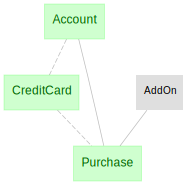

In [71]:
## in Sql, this is a query where the 'WHERE' clause includes another 'SELECT' clause
dj.Diagram(schema)

In [72]:
Account - CreditCard

phone,first_name,last_name,dob
10055394935,Christopher,Wagner,1924-09-12
10084670137,Ethan,Williams,1981-12-24
10167014702,Carlos,Ward,1942-01-14
10267271291,Devon,Miller,1995-02-28
10287276680,Amber,Martin,1998-04-24
10337443642,Jorge,Anderson,1971-03-30
10339185210,Kenneth,Sharp,2013-04-16
10364947168,Francisco,Hall,2005-08-16
10421607585,Jessica,Davis,1973-09-16
10440704679,Michael,Wilson,2021-04-14


In [74]:
##All the people that purchased AddOn #2
Account & (Purchase & 'addon_id=2')

phone,first_name,last_name,dob
10042163305,Danielle,Oneal,1995-11-06
10230461091,Jennifer,Lindsey,1939-05-20
10277217450,Rachel,Lee,1935-04-15
10582894532,Faith,Ruiz,1917-05-03
10695454925,Donna,Conrad,1977-09-10
10880874293,Rebecca,Smith,1933-04-20
10992298485,Jenna,Shepard,1936-12-26
11091626719,Emily,Mercado,1985-10-25
11729918424,Matthew,Williams,1929-07-12
12238364847,Natasha,Gross,1937-12-10


In [78]:
## Give me all accounts who have purchased both 2 and 3
Account & (Purchase & 'addon_id= 2') & (Purchase & 'addon_id=3')

phone,first_name,last_name,dob
22964247885,Charles,Franklin,2011-12-17
26951895510,Rachel,Arellano,1955-04-30
26994581489,William,Munoz,1945-11-03
32888392866,Amy,Washington,1931-11-25
34361911151,Alison,Hurst,1958-09-18
39366725183,Carlos,Johnson,1926-09-26
40944887248,Carmen,Hill,1972-10-18
42713589411,Diana,Williamson,1980-05-18
44606840694,Steven,Bell,1911-06-25
45319293705,Amanda,Fitzpatrick,1942-01-02


In [80]:
## Give me all accounts who have purchased both 2 or 3
Account & (Purchase & 'addon_id=2 OR addon_id=3')

phone,first_name,last_name,dob
10042163305,Danielle,Oneal,1995-11-06
10230461091,Jennifer,Lindsey,1939-05-20
10253375849,Katie,Briggs,1963-07-09
10277217450,Rachel,Lee,1935-04-15
10582894532,Faith,Ruiz,1917-05-03
10626471604,Miranda,Wilkinson,1929-04-12
10695454925,Donna,Conrad,1977-09-10
10880874293,Rebecca,Smith,1933-04-20
10964175066,Kelly,Clarke,1958-10-02
10992298485,Jenna,Shepard,1936-12-26


In [ ]:
## Give me all accounts who have purchased 2 but not 3